In [124]:
#Import necessary record libraries
import pandas as pd
import numpy as np

# For the model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [125]:
#Creating a data frame with atleat 100 record
# Define column names and data types
columns = ['Speed', 'Weather', 'Road_Type', 'Time_of_Day', 'Alcohol',
           'Driver_Age', 'Vehicle_Type', 'Vehicles_Involved', 'Seatbelt', 'Accident_Severity']

# Create a DataFrame with 100 rows of random data
data = pd.DataFrame(columns=columns)

# Generate random data for each column
data['Speed'] = np.random.randint(40, 120, 100)
data['Weather'] = np.random.randint(0, 3, 100)
data['Road_Type'] = np.random.randint(0, 2, 100)
data['Time_of_Day'] = np.random.randint(0, 24, 100)
data['Alcohol'] = np.random.randint(0, 2, 100)
data['Driver_Age'] = np.random.randint(18, 65, 100)
data['Vehicle_Type'] = np.random.randint(0, 3, 100)
data['Vehicles_Involved'] = np.random.randint(1, 4, 100)
data['Seatbelt'] = np.random.randint(0, 2, 100)
data['Accident_Severity'] = np.random.randint(1, 4, 100)  # Dependent variable

# Print the first 5 rows and exploring the data
print(data.head())
data.describe()
data.info()

   Speed  Weather  Road_Type  Time_of_Day  Alcohol  Driver_Age  Vehicle_Type  \
0    114        1          1            8        0          46             0   
1     80        1          0           19        0          57             1   
2     78        2          0            2        0          30             1   
3    100        2          1           17        0          48             2   
4     40        1          1            2        0          35             0   

   Vehicles_Involved  Seatbelt  Accident_Severity  
0                  3         1                  1  
1                  1         0                  2  
2                  1         1                  3  
3                  3         1                  2  
4                  3         0                  2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Speed 

In [126]:
# Saving the data in a CSV file
data.to_csv('accident_data_100.csv', index=False)

In [127]:
# Spliting data into features
X = data.drop('Accident_Severity', axis=1)
y = data['Accident_Severity']

In [128]:
# Spliting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [129]:
# Making predictions on the test set
y_pred = model.predict(X_test)
print(y_pred)

[2.24089124 1.88458794 1.69307411 2.29676266 2.11770628 2.5058888
 1.52042927 2.09867282 1.79447478 1.83974517 2.16524463 1.66788859
 1.24307397 1.9855864  1.68015477 1.80834728 1.74953037 1.66886107
 1.87031754 1.87987137]


In [130]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 0.4331920911500614
R-squared: -0.01331483309955872


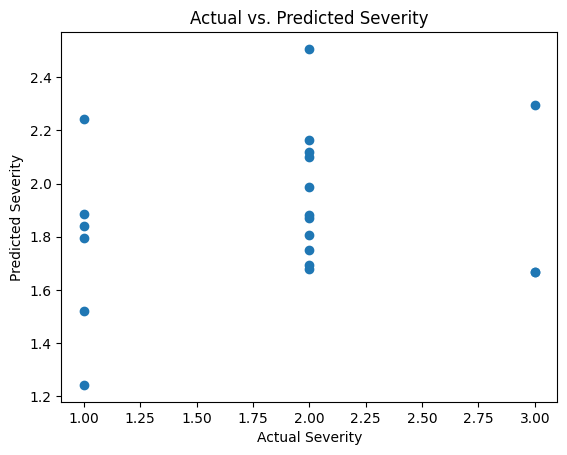

In [131]:
# Visualizing the result
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Severity')
plt.ylabel('Predicted Severity')
plt.title('Actual vs. Predicted Severity')
plt.show()

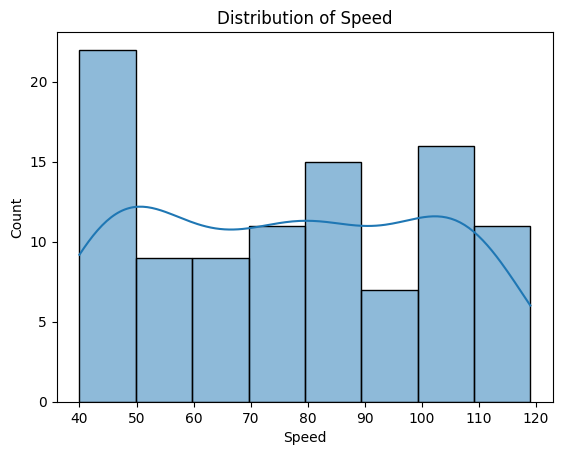

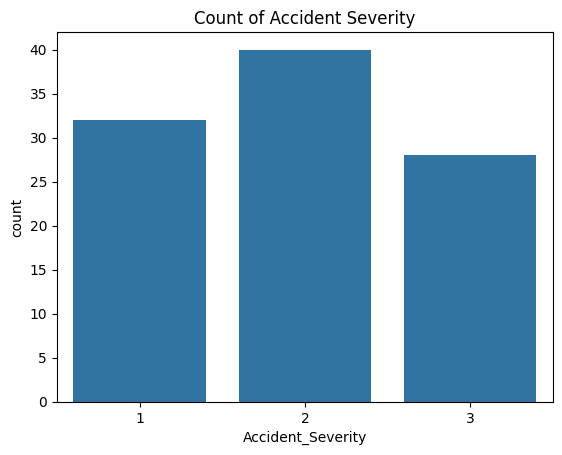

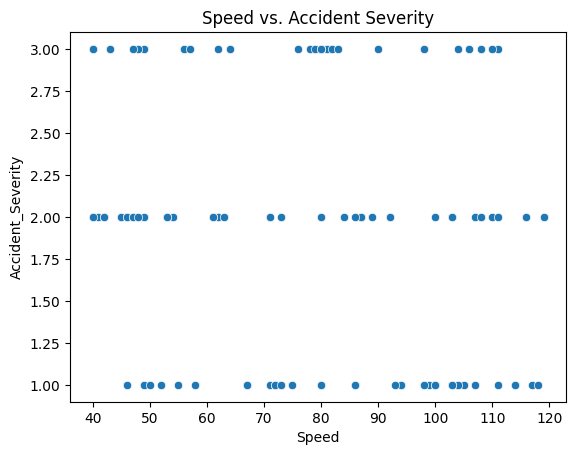

In [132]:


# Histogram of 'Speed'
sns.histplot(data['Speed'], kde=True)
plt.title('Distribution of Speed')
plt.show()

# Bar plot of 'Accident_Severity'
sns.countplot(x='Accident_Severity', data=data)
plt.title('Count of Accident Severity')
plt.show()

# Scatter plot of 'Speed' vs. 'Accident_Severity'
sns.scatterplot(x='Speed', y='Accident_Severity', data=data)
plt.title('Speed vs. Accident Severity')
plt.show()